# Traitement des résultats du 1er tour de l'éléction présidentielles 2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
frame_ville=pd.read_excel("ville.xls")
frame_resultats=pd.read_excel("Presidentielle_2017_Resultats_Communes_Tour_1.xls")

In [3]:
frame_ville.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35183 entries, 0 to 35182
Data columns (total 8 columns):
NomVille         35183 non-null object
MAJ              35183 non-null object
 Code Postal     35183 non-null int64
 Code INSEE      35183 non-null int64
Code Région      35183 non-null int64
 Latitude        35183 non-null float64
 Longitude       35183 non-null float64
 Eloignement     35097 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 2.1+ MB


In [4]:
frame_resultats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35496 entries, 0 to 35495
Data columns (total 95 columns):
Code du département       35496 non-null object
Libellé du département    35496 non-null object
Code de la commune        35496 non-null int64
Libellé de la commune     35496 non-null object
Inscrits                  35496 non-null int64
Abstentions               35496 non-null int64
% Abs/Ins                 35496 non-null float64
Votants                   35496 non-null int64
% Vot/Ins                 35496 non-null float64
Blancs                    35496 non-null int64
% Blancs/Ins              35496 non-null float64
% Blancs/Vot              35496 non-null float64
Nuls                      35496 non-null int64
% Nuls/Ins                35496 non-null float64
% Nuls/Vot                35496 non-null float64
Exprimés                  35496 non-null int64
% Exp/Ins                 35496 non-null float64
% Exp/Vot                 35496 non-null float64
N°Panneau                 

In [5]:
frame_res=pd.merge(frame_resultats,frame_ville,how='inner',
                   left_on='Libellé de la commune',right_on='NomVille')

In [13]:
frame_res.iloc[0]

Code du département                              1
Libellé du département                         Ain
Code de la commune                               1
Libellé de la commune      L'Abergement-Clémenciat
Inscrits                                       598
Abstentions                                     92
% Abs/Ins                                    15.38
Votants                                        506
% Vot/Ins                                    84.62
Blancs                                           2
% Blancs/Ins                                  0.33
% Blancs/Vot                                   0.4
Nuls                                             9
% Nuls/Ins                                    1.51
% Nuls/Vot                                    1.78
Exprimés                                       495
% Exp/Ins                                    82.78
% Exp/Vot                                    97.83
N°Panneau                                        2
Sexe                           

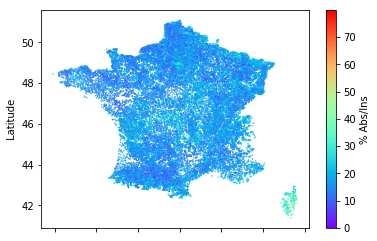

In [20]:
frame_res.plot(" Longitude "," Latitude ",kind="scatter",c="% Abs/Ins",cmap=plt.get_cmap("rainbow"),
               s=0.2)

In [28]:
frame_res.iloc[frame_res["% Abs/Ins"].idxmax()]

Code du département                  ZA
Libellé du département       Guadeloupe
Code de la commune                  126
Libellé de la commune       Saint-Louis
Inscrits                           2917
Abstentions                        2327
% Abs/Ins                         79.77
Votants                             590
% Vot/Ins                         20.23
Blancs                               21
% Blancs/Ins                       0.72
% Blancs/Vot                       3.56
Nuls                                 43
% Nuls/Ins                         1.47
% Nuls/Vot                         7.29
Exprimés                            526
% Exp/Ins                         18.03
% Exp/Vot                         89.15
N°Panneau                             3
Sexe                                  M
Nom                              MACRON
Prénom                         Emmanuel
Voix                                208
% Voix/Ins                         7.13
% Voix/Exp                        39.54


In [33]:
frame_res["Nom"].value_counts()

LE PEN           19329
MACRON            7393
FILLON            5490
MÉLENCHON         3605
LASSALLE            76
HAMON               25
DUPONT-AIGNAN       17
ASSELINEAU           2
POUTOU               1
Name: Nom, dtype: int64

In [36]:
from bokeh.charts import Scatter
from bokeh.plotting import output_file, show

In [37]:
p=Scatter(frame_res," Longitude "," Latitude ")
output_file("France.html")
show(p)